# ANALISI ESPLORATIVA

## Carichiamo i dati

I dati che utilizziamo in questo notebook sono già stati trasformati e sono sotto forma di file .csv

In [1]:
import os
import pandas as pd


%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Di seguito va inserito il path della cartella in cui sono stati inseriti i file csv che si vogliono utilizzare per l'esplorazione preliminare dei dati. E' necessario tenere presente che in un pc medio non possono essere inseriti più di 10-15 di questi file .csv, altrimenti verrebbe saturata la memoria RAM.

In [3]:
path=r'C:\Users\Luca\Desktop\Univ\Univ\3 anno\Big Data\PROGETTO_BIGDATA_2019\CSVusare'

In [4]:
D=pd.DataFrame()
for csv in os.listdir(path):
    D=pd.concat([D,pd.read_csv(path+'\\'+csv,engine='python')],ignore_index=True)


In [6]:
D

,GENERE,genere,lowlevel.average_loudness,lowlevel.barkbands.dmean.0,lowlevel.barkbands.dmean.1,lowlevel.barkbands.dmean.10,lowlevel.barkbands.dmean.11,lowlevel.barkbands.dmean.12,lowlevel.barkbands.dmean.13,lowlevel.barkbands.dmean.14,...,tonal.thpcp.4,tonal.thpcp.5,tonal.thpcp.6,tonal.thpcp.7,tonal.thpcp.8,tonal.thpcp.9,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
0,Rock,Space Rock; Psychedelic Rock; Progressive Rock,0.933375,1.034342e-03,0.030453,0.000222,0.000597,0.000181,0.000300,0.000427,...,0.075011,0.054389,0.056868,0.131414,0.235576,0.177998,0.542483,0.255477,434.193115,0.969874
1,Blues,Blues,0.789411,6.191568e-04,0.008692,0.000493,0.000409,0.000392,0.000245,0.000272,...,0.189206,0.317170,0.726230,0.765154,0.403645,0.288672,0.614851,0.187494,434.193115,0.857454
2,Metal,Metal,0.943393,4.767108e-03,0.016550,0.000643,0.001551,0.001288,0.000863,0.000644,...,0.191409,0.176348,0.199427,0.234989,0.256849,0.289638,0.379556,0.194293,434.193115,0.805709
3,Pop-Altro,Atmospheric,0.797138,9.243530e-06,0.001337,0.001098,0.001641,0.001315,0.000778,0.000944,...,0.315306,0.322765,0.271478,0.301722,0.396167,0.341809,0.389665,0.209474,433.191071,0.873228
4,Pop-Altro,Anime,0.159829,7.985527e-06,0.000024,0.000014,0.000002,0.000004,0.000002,0.000001,...,0.220345,0.080207,0.060574,0.048371,0.128961,0.196469,0.331707,0.078419,442.037933,0.740616
5,Techno-House,Electronic,0.928700,3.201312e-04,0.009964,0.000379,0.000827,0.000353,0.000225,0.000167,...,0.456815,0.530102,0.755750,0.814794,0.807581,0.746079,0.627963,0.283938,434.193115,0.921696
6,Blues,Blues/Rock,0.788611,5.465516e-07,0.000037,0.000246,0.000247,0.000279,0.000198,0.000163,...,0.777600,0.820898,0.882042,0.843067,0.784039,0.706841,0.371662,0.219212,435.197479,0.888051
7,Metal,Metal,0.915715,3.556576e-04,0.004790,0.000381,0.000487,0.000700,0.000299,0.000356,...,0.224361,0.265879,0.300680,0.242534,0.224311,0.224914,0.611032,0.251479,434.193115,0.934683
8,Pop-Altro,Other,0.005347,1.485603e-03,0.002848,0.000224,0.000431,0.000261,0.000248,0.000186,...,0.117122,0.123068,0.204453,0.427876,0.445418,0.265934,0.459238,0.258968,434.193115,0.889009
9,Rock,Pop; New Wave,0.597863,1.394395e-05,0.000783,0.000340,0.000341,0.000452,0.000563,0.000445,...,0.163566,0.222233,0.295459,0.362273,0.671967,0.920872,0.629404,0.010742,441.527557,0.735691


## Vediamo se ci sono dati mancanti

In [8]:
D.isnull().sum().sum()

14

Quali colonne hanno valori mancanti?

In [4]:
[i for i in D.columns if D[i].isnull().sum()]

['rhythm.beats_loudness.median',
 'rhythm.beats_loudness_band_ratio.median.0',
 'rhythm.beats_loudness_band_ratio.median.1',
 'rhythm.beats_loudness_band_ratio.median.2',
 'rhythm.beats_loudness_band_ratio.median.3',
 'rhythm.beats_loudness_band_ratio.median.4',
 'rhythm.beats_loudness_band_ratio.median.5']

Troviamo quali untità hanno valori mancanti

In [6]:
dindex=[i for i,v in enumerate(D['rhythm.beats_loudness.median'].isnull()) if v ]

In [8]:
D[dindex]   ### cancello D per non saturare la memoria centrale

## dividiamo esplicative quantitative da qualitative

In [9]:
iquant=D.select_dtypes(include=['Int64','float64']).columns
iqual=D.select_dtypes(include=['object']).columns[3:]

## Esploriamo le esplicative quantitative

### quantili

In [15]:
des=D.describe() ###d in output i quantili  delle var quantitative
des

,lowlevel.average_loudness,lowlevel.barkbands.dmean.0,lowlevel.barkbands.dmean.1,lowlevel.barkbands.dmean.10,lowlevel.barkbands.dmean.11,lowlevel.barkbands.dmean.12,lowlevel.barkbands.dmean.13,lowlevel.barkbands.dmean.14,lowlevel.barkbands.dmean.15,lowlevel.barkbands.dmean.16,...,tonal.thpcp.4,tonal.thpcp.5,tonal.thpcp.6,tonal.thpcp.7,tonal.thpcp.8,tonal.thpcp.9,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2.388700e+04,2.388700e+04,2.388700e+04,2.388700e+04,2.388700e+04,2.388700e+04,2.388700e+04,2.388700e+04,2.388700e+04,2.388700e+04,...,23887.000000,23887.000000,23887.000000,23887.000000,23887.000000,23887.000000,23887.000000,23887.000000,23887.000000,23887.000000
mean,7.120479e-01,1.450514e-03,5.646285e-03,3.953977e-04,3.882335e-04,3.319675e-04,2.964608e-04,2.635787e-04,2.171212e-04,2.048269e-04,...,0.273187,0.340846,0.429446,0.376797,0.355635,0.386133,0.550892,0.134638,438.543174,0.795362
std,2.917716e-01,5.596930e-03,7.867112e-03,2.785815e-04,2.770805e-04,2.366688e-04,2.116525e-04,1.892855e-04,1.660979e-04,1.616007e-04,...,0.167493,0.172828,0.208744,0.176745,0.188859,0.220062,0.114896,0.097174,4.919032,0.103637
min,4.706927e-07,4.301918e-11,3.264229e-11,5.279443e-11,7.536255e-11,1.011501e-10,1.654898e-10,9.155574e-10,2.151942e-09,1.767545e-09,...,0.000102,0.000076,0.000064,0.000020,0.000004,0.000008,0.082621,0.000000,431.193909,0.559760
25%,5.837854e-01,2.509585e-05,9.737653e-04,2.138757e-04,2.037881e-04,1.717326e-04,1.511963e-04,1.298275e-04,9.583105e-05,8.470422e-05,...,0.152810,0.213118,0.269331,0.246099,0.212470,0.214482,0.477127,0.043095,434.193115,0.708578
50%,8.464924e-01,1.364249e-04,3.350846e-03,3.375728e-04,3.311886e-04,2.858334e-04,2.581244e-04,2.308075e-04,1.857321e-04,1.724417e-04,...,0.236184,0.314507,0.403166,0.355626,0.332199,0.359383,0.560561,0.124315,437.971466,0.802223
75%,9.274482e-01,6.387969e-04,7.555968e-03,5.061351e-04,4.989096e-04,4.309861e-04,3.917416e-04,3.553694e-04,2.984154e-04,2.834520e-04,...,0.360071,0.442792,0.567589,0.482975,0.473824,0.529728,0.634608,0.215189,441.527557,0.883880
max,9.906840e-01,3.016641e-01,3.105732e-01,7.468793e-03,3.401139e-03,3.789515e-03,3.786742e-03,3.411896e-03,2.513462e-03,1.696476e-03,...,0.995601,0.989234,0.999837,0.998024,0.999503,0.999794,0.915307,0.489516,456.570251,0.999236


vediamo come si distribuisce la media tra le variabili

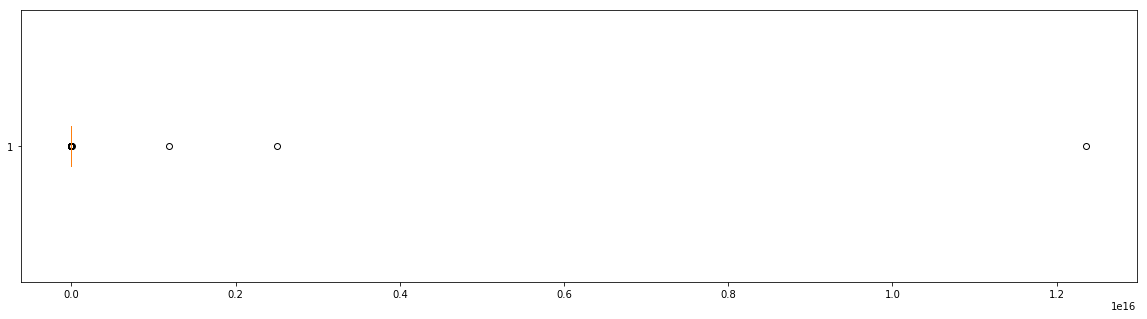

In [16]:


plt.figure(figsize=(20,5))
plt.boxplot(des.loc['mean',:],vert=False)


plt.show()

Vediamoche almeno il 75% delle variabili quantitative ha media vicino allo zero mentre ce ne sono poche con valori giganteschi.
sara' necessario allora standardizzare i dati in modo che tutte le variabili abbiano la stessa influenza sul modello.

### correlazione

In [17]:
corr=D[iquant].corr()
corr

KeyboardInterrupt: 

vediamo quali variabili hanno carrelazione molto alta (>0.95)

In [ ]:
varcor=[(corr.index[i],corr.columns[j]) for i in range(len(corr))  for j in range(i) if corr.iloc[i,j]>0.95]

In [ ]:
len(varcor)

In [ ]:
varcor

In [ ]:
varcor2=[(corr.index[i],corr.columns[j]) for i in range(len(corr))  for j in range(i) if corr.iloc[i,j]<-0.95]

In [ ]:
varcor2

Sono Tantissime. Cerchiamo di scremare prima in base a quello che conosciamo delle variabili

Tra le variabili del dataset vengono incluse le energie spettrali in determinate bande di frequenza. Queste bande di frequenza sono determinate con tre criteri che, seppur differenti, hanno il comune obbiettivo di determinare bande che l'orecchio umano giudicherebbe tonolmente equispaziate (la percezione di quanto una nota sia acuta o grave è infatti funzione approssimativamente logaritmica della frequenza). Infatti:

Do2:    66 Hz                               

Do2#    70 Hz                 


Do5:  523 Hz

Do5#  554 Hz

Le Bande determinite con questi tre differenti criteri sono:
- Barkbands (27 bande)
- MelBands  (40 bande  o anche 128)
- ErbBands  (40 bande)



    

L'MFCC e il GFCC sono indicatori che non si basano direttamente sulla potenza rilevata sullo spettro (la trasformata di fourier del segnale nel domino del tempo) del segnale ma bensì sulla trasformata di fourier del log dello spettro.Il risultato di tale trasformazione viene chiamato 'Cepstrum'; la parola è ottenuta trasponendo specularmente la prima metà della parola Spectrum. 
In particolare l'MFCC analizza il Cepstrum del segnale nelle Mel bands mentre il Gfcc lo fa nell ERBbands;

vediamo se l'MFCC e il GFCC portano la stessa informazione

In [24]:
c=D[[c for c in D3.columns if 'mfcc' in c or 'gfcc' in c]].corr()
c

,lowlevel.gfcc.cov,lowlevel.gfcc.mean.0,lowlevel.gfcc.mean.1,lowlevel.gfcc.mean.10,lowlevel.gfcc.mean.11,lowlevel.gfcc.mean.12,lowlevel.gfcc.mean.2,lowlevel.gfcc.mean.3,lowlevel.gfcc.mean.4,lowlevel.gfcc.mean.5,...,lowlevel.mfcc.mean.11,lowlevel.mfcc.mean.12,lowlevel.mfcc.mean.2,lowlevel.mfcc.mean.3,lowlevel.mfcc.mean.4,lowlevel.mfcc.mean.5,lowlevel.mfcc.mean.6,lowlevel.mfcc.mean.7,lowlevel.mfcc.mean.8,lowlevel.mfcc.mean.9
lowlevel.gfcc.cov,1.000000,0.239350,-0.239120,-0.274114,0.125324,-0.236002,-0.001504,0.206808,-0.203975,0.288968,...,-0.059474,-0.046418,0.108853,0.001589,0.117220,-0.028175,0.086824,0.035401,0.036445,0.046308
lowlevel.gfcc.mean.0,0.239350,1.000000,-0.552084,-0.320174,0.302154,-0.304695,-0.061190,0.502234,0.057283,0.440128,...,0.205307,0.062366,-0.124077,0.395655,0.205200,0.440428,0.345887,0.448619,0.347339,0.331535
lowlevel.gfcc.mean.1,-0.239120,-0.552084,1.000000,0.395940,-0.501164,0.397761,-0.028557,-0.461753,0.110165,-0.481146,...,-0.180105,-0.072963,0.020047,-0.220991,-0.118501,-0.276622,-0.246867,-0.313676,-0.265707,-0.264664
lowlevel.gfcc.mean.10,-0.274114,-0.320174,0.395940,1.000000,-0.081682,0.547954,0.109141,-0.420541,0.346380,-0.397521,...,0.397250,0.429943,-0.079371,-0.114774,-0.140666,0.018352,0.016632,0.011432,-0.248993,0.157579
lowlevel.gfcc.mean.11,0.125324,0.302154,-0.501164,-0.081682,1.000000,-0.168946,0.194267,0.095863,0.065462,0.230683,...,0.348998,0.464837,0.088235,0.070216,0.068182,0.210325,0.102621,0.358938,0.214333,0.051813
lowlevel.gfcc.mean.12,-0.236002,-0.304695,0.397761,0.547954,-0.168946,1.000000,0.045039,-0.269443,0.191902,-0.240294,...,0.074463,0.203561,-0.016516,-0.108027,-0.060001,-0.028523,0.049861,-0.184963,0.157849,-0.024647
lowlevel.gfcc.mean.2,-0.001504,-0.061190,-0.028557,0.109141,0.194267,0.045039,1.000000,-0.133479,0.348891,0.003256,...,0.116971,0.162345,0.802396,0.171418,0.324959,0.360528,0.293627,0.140124,0.199474,0.128194
lowlevel.gfcc.mean.3,0.206808,0.502234,-0.461753,-0.420541,0.095863,-0.269443,-0.133479,1.000000,-0.237370,0.609025,...,0.095526,-0.065213,0.102044,0.695394,0.409144,0.311011,0.333247,0.389928,0.292977,0.224564
lowlevel.gfcc.mean.4,-0.203975,0.057283,0.110165,0.346380,0.065462,0.191902,0.348891,-0.237370,1.000000,-0.335558,...,0.288736,0.280252,-0.202276,0.331682,0.363996,0.568901,0.387315,0.361676,0.376240,0.273294
lowlevel.gfcc.mean.5,0.288968,0.440128,-0.481146,-0.397521,0.230683,-0.240294,0.003256,0.609025,-0.335558,1.000000,...,0.183882,0.071714,0.288957,0.003886,0.419569,0.318455,0.462860,0.424953,0.400687,0.362613


In [25]:
[(m,m.replace('mf','gf'),c.loc[m,m.replace('mf','gf')]) for m in c.columns if m.split('.')[1]=='mfcc']  

[('lowlevel.mfcc.cov', 'lowlevel.gfcc.cov', 0.6718137401001822),
 ('lowlevel.mfcc.mean.0', 'lowlevel.gfcc.mean.0', 0.9599098799822822),
 ('lowlevel.mfcc.mean.1', 'lowlevel.gfcc.mean.1', 0.9045232428584551),
 ('lowlevel.mfcc.mean.10', 'lowlevel.gfcc.mean.10', 0.22987485970310112),
 ('lowlevel.mfcc.mean.11', 'lowlevel.gfcc.mean.11', 0.3489984230343876),
 ('lowlevel.mfcc.mean.12', 'lowlevel.gfcc.mean.12', 0.20356145264326492),
 ('lowlevel.mfcc.mean.2', 'lowlevel.gfcc.mean.2', 0.8023963603026452),
 ('lowlevel.mfcc.mean.3', 'lowlevel.gfcc.mean.3', 0.6953935113594969),
 ('lowlevel.mfcc.mean.4', 'lowlevel.gfcc.mean.4', 0.36399590772152723),
 ('lowlevel.mfcc.mean.5', 'lowlevel.gfcc.mean.5', 0.3184548445790078),
 ('lowlevel.mfcc.mean.6', 'lowlevel.gfcc.mean.6', 0.3759261882597374),
 ('lowlevel.mfcc.mean.7', 'lowlevel.gfcc.mean.7', 0.25567151864819787),
 ('lowlevel.mfcc.mean.8', 'lowlevel.gfcc.mean.8', 0.26257818175645076),
 ('lowlevel.mfcc.mean.9', 'lowlevel.gfcc.mean.9', 0.3844419623657903)]

Sembrano portare informazione ridondante solo in parte, perciò li terremo entrambi

Passiamo ora agli indicatori riguardanti il ritmo. Il file originale aveva per ogni brano un vettore che rappresentava le posizioni stimate dei beat, le quali sono già state tolte perchè rappresentano una misura poco confrontabile tra brani diversi visto che i brani hanno diversi bpm e e visto che la lunghezza di tali vettori varia in base alla lunghezza del brano.
Nel dataset però è ancora presente la misura 'beat_counts', la quale non indica nulla di particolarmente significativo (dipende infatti dalla lunghezza del brano). Eliminiamo allora 'beat_counts':

In [13]:
D=D.drop(['rhythm.beats_count'],axis=1)

Passiamo Ora agli indicatori armonici. In particolare l'HPCP (Harmonic Pitch Class Profile) può essere considerato l' "impronta digitale" armonica del brano. In particolare, analizzando le armoniche principali del brano (pulite dalle iregolarità del timbro dato dagli strumenti), dà indicazioni su quali siano le note più importanti su quale sia il rapporto che intercorre tra queste e, quindi, indirettamente, sulla tonalità del brano.

## Esploriamo le esplicative qualitative

Vediamo quanti livelli ha ognuna

In [69]:
D[iqual].nunique()

tonal.chords_scale     2
tonal.key_key         12
tonal.key_scale        2
dtype: int64

Vediamo se ci sono valori nulli

In [ ]:
D[iqual].isnull().sum()

## Esploriamo la variabile risposta

In [27]:

for i in set(D['GENERE']):
    print('{} : {} % '.format(i,100*sum([j==i for j in D['GENERE']])/len(D)))

Blues : 1.9885293255745804 % 
Ambient : 1.5950098379871898 % 
Techno-House : 7.355465315862184 % 
Metal : 6.744254196843471 % 
Hip-Hop : 2.691840750198853 % 
Rock : 29.359065600535857 % 
Pop-Altro : 38.782601414995604 % 
Funk : 0.5986519864361368 % 
Jazz : 5.002721145392892 % 
Classical : 5.881860426173232 % 


vediamo se ci sono valori nulli

In [30]:
D['GENERE'].isnull().sum()

0

## Otteniamo indici di Training set, Validation set e Test set

Assegnamo il 25% delle osservazioni a test e validation e lasciamo il 50% delle osservazioni per il training

In [31]:
from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(D2.index.values, test_size=0.25,random_state=40)
idx_train, idx_val = train_test_split(idx_train, test_size=len(idx_test),random_state=40)


In [32]:
len(idx_train)+len(idx_test)+len(idx_val)==len(D)

True

## Trasformazione Variabili

Usiamo le classi  e le funzioni del modulo 'ModuloProgetto', implementato da noi e presente tra i file inviati, insieme alla pipeline di ScikitLearn per sostituire valori mancanti, eliminare le variabili molto correlate, eliminare le variabili costanti (che presentano lo stesso valore su tutte le unità), trasformare le esplicative categoriali in dummies e standardizzare

In [7]:
from ModuloProgetto import preprocessamento_esplicative as pe

In [8]:
from sklearn.pipeline import Pipeline

In [10]:
pipe=Pipeline([('manc',pe.Sost_Mancanti(sost_categoriali=True)),
               ('costanti',pe.Elimina_Costanti()),
               ('corr',pe.Elimina_Correlate(soglia=0.9)),
               ('dummies',pe.Ottieni_Dummies()),
               ('standardizza',pe.Standardizza())])

In [12]:
y=D['GENERE']

In [13]:
X=pipe.fit_transform(D.iloc[:,2:])

## Visualizzazione tramite t-SNE

In [5]:
from sklearn.manifold import TSNE

In [6]:
tsne=TSNE(n_components=2,verbose=1)

In [17]:
coord=tsne.fit_transform(X.iloc[idx_train,:])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11944 samples in 1.950s...
[t-SNE] Computed neighbors for 11944 samples in 538.688s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11944
[t-SNE] Computed conditional probabilities for sample 2000 / 11944
[t-SNE] Computed conditional probabilities for sample 3000 / 11944
[t-SNE] Computed conditional probabilities for sample 4000 / 11944
[t-SNE] Computed conditional probabilities for sample 5000 / 11944
[t-SNE] Computed conditional probabilities for sample 6000 / 11944
[t-SNE] Computed conditional probabilities for sample 7000 / 11944
[t-SNE] Computed conditional probabilities for sample 8000 / 11944
[t-SNE] Computed conditional probabilities for sample 9000 / 11944
[t-SNE] Computed conditional probabilities for sample 10000 / 11944
[t-SNE] Computed conditional probabilities for sample 11000 / 11944
[t-SNE] Computed conditional probabilities for sample 11944 / 11944
[t-SNE] Mean sigma: 6.122786
[t-SNE] KL divergen

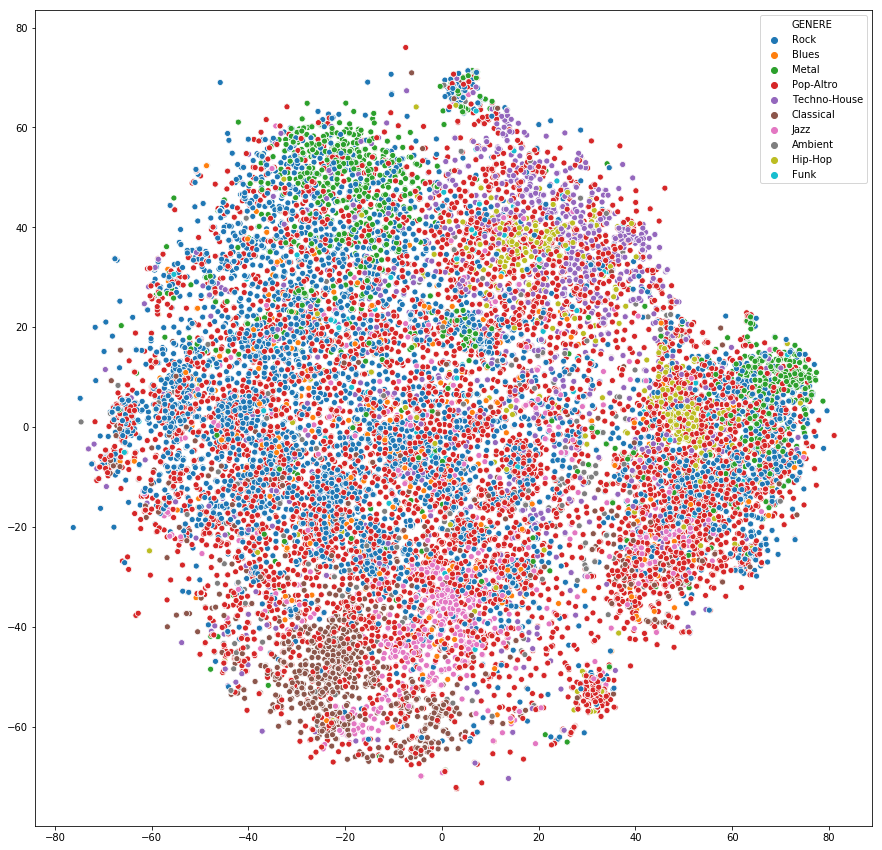

In [15]:
plt.figure(figsize=(15,15))

sns.scatterplot(coord[:,0],coord[:,1],hue=y[idx_train])

vediamo che tenendo tutti i generi non c'i sono scluster evidenti... inoltre Rock e Pop sono molto più numerosi degli altri generi; decidiamo quindi di tenere solo 'Metal', 'Classical', 'jazz', techno-house', 'hip-hop'.

## Eliminazione Generi Troppo Generici

Usiamo la funzione 'elimina_generi' del modulo 'ModuloProgetto' per eliminare i generi troppo generici 

In [ ]:
from ModuloProgetto import semplifica_dataset as sd

In [ ]:
D=sd.elimina_generi(D)

In [ ]:
idx_train, idx_test = train_test_split(D.index.values, test_size=0.25,random_state=40)
idx_train, idx_val = train_test_split(idx_train, test_size=len(idx_test),random_state=40)


In [ ]:
y=D['GENERE']
X=D.iloc[:,2:]

## Usiamo le tSNE sui dati trasformati

In [73]:

coord2  = tsne.fit_transform(X.iloc[idx_train,:])

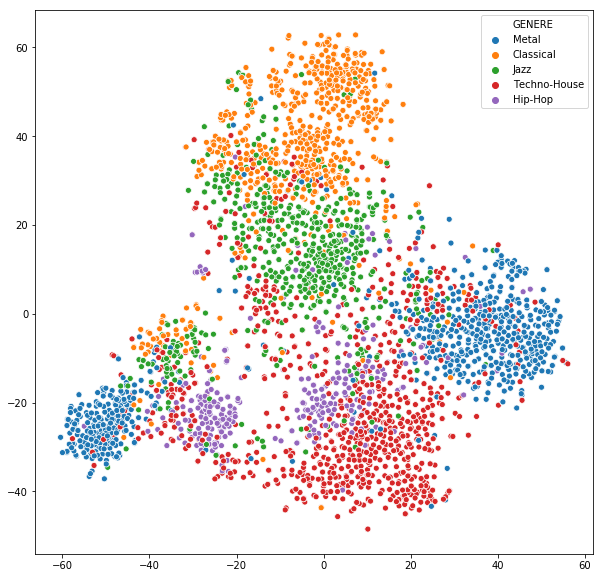

In [74]:
plt.figure(figsize=(10,10))

sns.scatterplot(coord2[:,0],coord2[:,1],hue=y[idx_train])

plt.show()

vediamo che ora sono visibili distintamente dei cluster!